In [0]:
# перезагрузить ноутбук
!kill -9 -1

# Подготовка аудио файлов (все файлы из одного директория)
Можно оставить в этом директории, можно перекинуть в другой

Копирование файлов с Git на локальный диск виртуальной машины - вставка ссылки с гитхаба: 

In [0]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git


Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 265 (delta 30), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (265/265), 3.91 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [0]:
!pip install soundfile

In [0]:
!pip install pydub

In [0]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt



---



In [0]:


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Нужно указать путь:
dir_path = '/content' # откуда берем файлы 
dir_path_mod = '/content' # куда складываем обработанные файлы. скидываем в тот же директорий или в другой

#______________________________________________

#изменяем кол-во каналов до 1 и framerate до 16000, длину сокращаем или дополняем молчанием до 1 сек
from pydub import silence, AudioSegment
audio = AudioSegment.from_file(dir_path + '/' + sample_file, format="wav")


def preprocess_audio(filename):
    # Trim or pad audio segment to 10000ms
   
    padding = AudioSegment.silent(duration=1000)         # ставим [:1000] если обрабатывам raw audio files
    segment = AudioSegment.from_wav(filename)[:1000]     # ставим [:1000] если обрабатывам raw audio files
    segment = padding.overlay(segment)
    
    # Set frame rate to 16000
    segment = segment.set_frame_rate(16000).set_channels(1)  # ставим 16000 если обрабатывам raw audio files

    # Export segment as wav
    modified_file = "seg_" + sample_file    # ставим seg если обрабатывам файлы для потока
    segment.export(dir_path_mod + '/' + modified_file, format='wav')
    
    
#preprocess_audio(dir_path + '/' + sample_file)



In [0]:
dir_path = os.path.join(os.path.dirname(os.path.abspath('__file__')))
#dir_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), dir_phrase) # нужно указывать наверху название фразы/директорий
files = os.listdir(dir_path)
sample_files = [i for i in files if i.endswith('.wav')]
print(sample_files)

for sample_file in sample_files:
 #   speech_command_algo(dir_path,sample_file)
 print(sample_file)
 preprocess_audio(sample_file)

['1_up_dog_marvin.wav', '2_up_dog_marvin.wav', '3_up_dog_marvin.wav']
1_up_dog_marvin.wav
2_up_dog_marvin.wav
3_up_dog_marvin.wav


Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 14400
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=14400, comptype='NONE', compname='not compressed')
2_up_dog_marvin.wav
16000
[ 0  0  0 ... -7 -2 -1]
sound durantion =  0.9


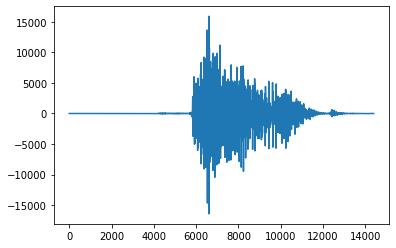

Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 16000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')
seg_2_up_dog_marvin.wav
16000
[0 0 0 ... 0 0 0]
sound durantion =  1.0


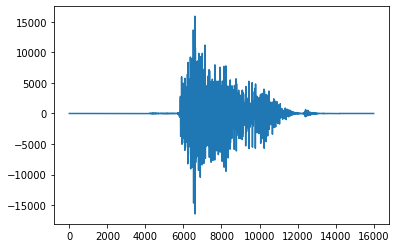

In [0]:
# для контроля можно сравнить оригинальный и полученный файл:

sample_file = '2_up_dog_marvin.wav'

import wave
obj = wave.open(dir_path +'/' + sample_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path + '/' + sample_file)
d = obj.getnframes()/obj.getframerate()
print(sample_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()

modified_file = "seg_2_up_dog_marvin.wav"
obj = wave.open(dir_path_mod +'/' + modified_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path_mod + '/' + modified_file)
d = obj.getnframes()/obj.getframerate()
print(modified_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()




---



---

